In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os, glob
import seaborn as sns
from scipy.optimize import curve_fit
plt.style.use("seaborn-whitegrid")
#plt.style.use("classic")
cm = 1/2.54

In [2]:
conff0 = glob.glob('may_data/md30/data_A0**.txt')
conff0 = sorted(conff0)
conff_1 = glob.glob('data/ConfT5F-1S**.txt')
conff_1 = sorted(conff_1)
conff1 = glob.glob('data/ConfT5F+1S**.txt')
conff1 = sorted(conff1)

In [3]:
conff0

['may_data/md30/data_A001.txt',
 'may_data/md30/data_A002.txt',
 'may_data/md30/data_A003.txt',
 'may_data/md30/data_A004.txt',
 'may_data/md30/data_A005.txt',
 'may_data/md30/data_A006.txt',
 'may_data/md30/data_A007.txt',
 'may_data/md30/data_A008.txt',
 'may_data/md30/data_A009.txt',
 'may_data/md30/data_A010.txt',
 'may_data/md30/data_A011.txt',
 'may_data/md30/data_A012.txt',
 'may_data/md30/data_A013.txt',
 'may_data/md30/data_A014.txt',
 'may_data/md30/data_A015.txt',
 'may_data/md30/data_A016.txt',
 'may_data/md30/data_A017.txt',
 'may_data/md30/data_A018.txt',
 'may_data/md30/data_A019.txt',
 'may_data/md30/data_A020.txt',
 'may_data/md30/data_A021.txt',
 'may_data/md30/data_A022.txt',
 'may_data/md30/data_A023.txt',
 'may_data/md30/data_A024.txt',
 'may_data/md30/data_A025.txt',
 'may_data/md30/data_A026.txt',
 'may_data/md30/data_A027.txt',
 'may_data/md30/data_A028.txt',
 'may_data/md30/data_A029.txt',
 'may_data/md30/data_A030.txt']

In [4]:
beads = 0; 
#jmp = 5 ; dt = 'dt05'; Dt = 0.05
#jmp = 10 ; dt = 'dt1'; Dt = 0.1
#jmp = 20 ; dt = 'dt2'; Dt = 0.2
#jmp = 30 ; dt = 'dt3'; Dt = 0.3
#jmp = 50 ; dt = 'dt5'; Dt = 0.5

#jmp = 0 ; dt = 'dt0'; Dt = 0.1 
jmp = 20 ; dt = 'dt0'; Dt = 2 
v00 = 0.8

v0 = 7.0; v_1 = 7.7; v1 = 7.8

conf0 = []; #conf_1 = []; conf1 = []; 
xy0 = []; xy_1 = []; xy1 = [];
xdiff0 = []; ydiff0 = []; 
# xdiff_1 = []; ydiff_1 = [];
# xdiff1 = []; ydiff1 = []; 
# bf0 = []; bf_1 = []; bf1 = []

for i in conff0:
    _ = pd.read_csv(i, names=['t','x','y','z'], delim_whitespace=True)
    #xy0_ = _[0::beads]
    xy0.append(_)
    _ = _[0::jmp]
    conf0.append(_)
    xdiff0.append(np.diff(_['x']))
    ydiff0.append(np.diff(_['y']))

# for j in conff_1:
#     _ = pd.read_csv(j, names=['t','x','y','z'], delim_whitespace=True)
#     xy_1_ = _[0::beads]
#     xy_1.append(xy_1_)
#     _ = xy_1_[0::jmp]
#     conf_1.append(_)
#     xdiff_1.append(np.diff(_['x']))
#     ydiff_1.append(np.diff(_['y']))
    
# for j in conff1:
#     _ = pd.read_csv(j, names=['t','x','y','z'], delim_whitespace=True)
#     xy1_ = _[0::beads]
#     xy1.append(xy1_)
#     _ = xy1_[0::jmp]
#     conf1.append(_)
#     xdiff1.append(np.diff(_['x']))
#     ydiff1.append(np.diff(_['y']))


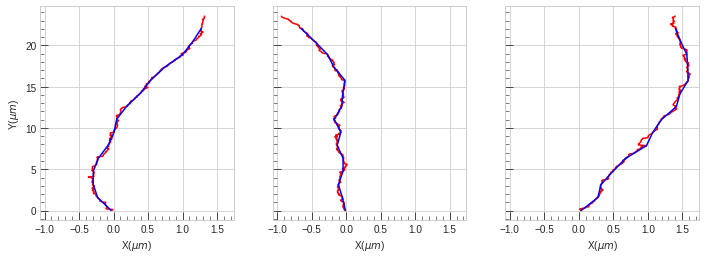

In [5]:
fig, ax = plt.subplots(1,3, figsize=(30*cm, 10*cm), sharex = True, sharey = True)

ax[0].plot(xy0[0]['x'], xy0[0]['y'], color='red')
ax[0].plot(conf0[0]['x'], conf0[0]['y'], color='blue')
ax[0].minorticks_on()
ax[0].tick_params('both', direction='in', length=8, which='major')
ax[0].tick_params('both', direction='in', length=4, which='minor')
ax[0].set_xlabel('X($\mu m$)')
ax[0].set_ylabel('Y($\mu m$)')

ax[1].plot(xy0[1]['x'], xy0[1]['y'], color='red')
ax[1].plot(conf0[1]['x'], conf0[1]['y'], color='blue')
ax[1].minorticks_on()
ax[1].tick_params('both', direction='in', length=8, which='major')
ax[1].tick_params('both', direction='in', length=4, which='minor')
ax[1].set_xlabel('X($\mu m$)')

ax[2].plot(xy0[2]['x'], xy0[2]['y'], color='red')
ax[2].plot(conf0[2]['x'], conf0[2]['y'], color='blue')
ax[2].minorticks_on()
ax[2].tick_params('both', direction='in', length=8, which='major')
ax[2].tick_params('both', direction='in', length=4, which='minor')
ax[2].set_xlabel('X($\mu m$)')

plt.show()

In [6]:
ubx0 = []; uby0 = []
ubx_1 = []; uby_1 = []
ubx1 = []; uby1 = []

for i in range(len(xdiff0)):
    b0 = np.sqrt(xdiff0[i]**2 + ydiff0[i]**2)
    ubx0.append(xdiff0[i]/b0)
    uby0.append(ydiff0[i]/b0)

# for j in range(len(xdiff_1)):
#     b_1 = np.sqrt(xdiff_1[j]**2 + ydiff_1[j]**2)
#     ubx_1.append(xdiff_1[j]/b_1)
#     uby_1.append(ydiff_1[j]/b_1)    
    
# for j in range(len(xdiff1)):
#     b1 = np.sqrt(xdiff1[j]**2 + ydiff1[j]**2)
#     ubx1.append(xdiff1[j]/b1)
#     uby1.append(ydiff1[j]/b1)

In [7]:
ub0 = []; ub_1 = []; ub1 = []

for i in range(len(ubx0)):
    ub0.append(pd.DataFrame({'ubx':ubx0[i], 'uby':uby0[i]}))
    
# for j in range(len(ubx_1)):
#     ub_1.append(pd.DataFrame({'ubx':ubx_1[j], 'uby':uby_1[j]}))
    
# for j in range(len(ubx1)):
#     ub1.append(pd.DataFrame({'ubx':ubx1[j], 'uby':uby1[j]}))

In [8]:
len(ub0)

30

In [9]:
ub0[29]

,ubx,uby
0,-0.052508,0.998621
1,-0.104246,0.994552
2,-0.117387,0.993086
3,-0.125752,0.992062
4,-0.019751,0.999805
5,-0.074364,0.997231
6,-0.077597,0.996985
7,0.089850,0.995955
8,0.145708,0.989328
9,0.018132,0.999836


In [10]:
_ = []; ds0 = []; dsm0 = []; s0 = []; c = 0; ds0_ = []; dsm_ = []; s_ = []

# try:
#     os.remove('ds_ub_status.txt')
# except:
#     print("'ds_ub_status.txt' does not exist.")
    
for h in range(len(ub0)):
    for i in range(len(ub0[h])-1):
#         print("Ds = %s"%i, file=open('ds_ub_status.txt','a'))
        for j in range(len(ub0[h])-1):
            try:
                _.append(np.dot(ub0[h].loc[j].values,ub0[h].loc[j+i].values))
#                 print("Ub%s.Ub%s"%(j,j+i), file=open('ds_ub_status.txt','a'))
            except:
                pass #print("No: Ub%s.Ub%s"%(j,j+i))
        ds0_.append(_) # not necessary to save or is it?
        dsm_.append(np.mean(_))
        s_.append(c)
        _ = [] # empty this bucket
        c+=1;
    s0.append(s_)
    dsm0.append(dsm_)
    ds0.append(ds0_)
    c = 0; ds0_ = []; dsm_ = []; s_ = [] # reset stuff

s0 = np.array(s0)
#ds0 = np.array(ds0)
dsm0 = np.array(dsm0)

In [11]:
s0[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [12]:
dsm0[29]

array([1.        , 0.99634603, 0.9930206 , 0.99259181, 0.99154138,
       0.98992622, 0.9839248 , 0.9763592 , 0.97688177, 0.975413  ,
       0.96452149, 0.95991453, 0.95198641])

In [13]:
pd.DataFrame(dsm0.T)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998854,0.997445,0.997255,0.997316,0.998472,0.998230,0.998388,0.997408,0.998043,0.998306,...,0.997999,0.998589,0.998184,0.998192,0.997358,0.998246,0.997423,0.997938,0.998950,0.996346
2,0.997446,0.997987,0.997573,0.996042,0.997674,0.998056,0.996835,0.995144,0.995583,0.995992,...,0.996580,0.997541,0.996082,0.995813,0.996284,0.996142,0.992874,0.996073,0.998016,0.993021
3,0.997064,0.996360,0.996492,0.995182,0.996401,0.997217,0.995916,0.993481,0.993577,0.995320,...,0.996679,0.997236,0.994966,0.992270,0.994222,0.995679,0.985956,0.996472,0.996097,0.992592
4,0.996146,0.995973,0.995959,0.994330,0.994631,0.996473,0.995757,0.991476,0.992320,0.995192,...,0.995860,0.997471,0.993248,0.987657,0.992467,0.994818,0.974275,0.995358,0.994442,0.991541
5,0.995664,0.995489,0.995013,0.993466,0.993146,0.995881,0.995761,0.989905,0.992525,0.993652,...,0.994100,0.997483,0.993140,0.983356,0.991389,0.991707,0.961252,0.994535,0.993115,0.989926
6,0.995229,0.995927,0.992475,0.992915,0.992212,0.995192,0.998369,0.983347,0.995439,0.991337,...,0.993606,0.996192,0.992942,0.976271,0.986751,0.987703,0.947825,0.995806,0.992720,0.983925
7,0.992943,0.996486,0.993858,0.994242,0.990333,0.994451,0.999011,0.975170,0.999079,0.990230,...,0.992903,0.997795,0.988949,0.968760,0.988944,0.985699,0.933744,0.996587,0.993318,0.976359
8,0.990774,0.995229,0.990158,0.995418,0.988774,0.994748,0.997120,0.967847,0.999096,0.987951,...,0.989482,0.999189,0.984622,0.957062,0.983699,0.982364,0.917904,0.996911,0.994814,0.976882
9,0.989465,0.996402,0.989097,0.993374,0.987444,0.993907,0.995831,0.968576,0.997134,0.985020,...,0.987948,0.999596,0.983700,0.948123,0.982395,0.977422,0.909783,0.997723,0.996209,0.975413


In [14]:
pd.DataFrame(s0.T)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
6,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
7,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
8,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
9,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [15]:
try:
    os.remove('may_data/s0_m'+dt+'.csv')
    os.remove('may_data/dsm0_m'+dt+'.csv')
    os.remove('may_data/s_1_m'+dt+'.csv')
    os.remove('may_data/dsm_1_m'+dt+'.csv')
    os.remove('may_data/s1_m'+dt+'.csv')
    os.remove('may_data/dsm1_m'+dt+'.csv')
except:
    print("'xxx.csv' does not exist.")

dfs0 = pd.DataFrame(s0.T)#{'s00':s0[0], 's01':s0[1], 's02':s0[2], 's03':s0[3]})
dfdsm0 = pd.DataFrame(dsm0.T)#{'dsm00':dsm0[0], 'dsm01':dsm0[1], 'dsm02':dsm0[2], 'dsm03':dsm0[3]})

s0_m = dfs0.mean(axis=1)*v00*Dt
s0_m.to_csv('may_data/s0_m'+dt+'.csv', index=False)
dsm0_m = dfdsm0.mean(axis=1)
dsm0_m.to_csv('may_data/dsm0_m'+dt+'.csv', index=False)
#=========================================================
# dfs_1 = pd.DataFrame({'s_10':s_1[0], 's_11':s_1[1], 's_12':s_1[2], 's_13':s_1[3]})
# dfdsm_1 = pd.DataFrame({'dsm_10':dsm_1[0], 'dsm_11':dsm_1[1], 'dsm_12':dsm_1[2], 'dsm_13':dsm_1[3]})

# s_1_m = dfs_1.mean(axis=1)*v_1*Dt
# s_1_m.to_csv('data/s_1_m'+dt+'.csv', index=False)
# dsm_1_m = dfdsm_1.mean(axis=1)
# dsm_1_m.to_csv('data/dsm_1_m'+dt+'.csv', index=False)
# #=========================================================
# dfs1 = pd.DataFrame({'s10':s1[0], 's11':s1[1], 's12':s1[2], 's13':s1[3]})
# dfdsm1 = pd.DataFrame({'dsm10':dsm1[0], 'dsm11':dsm1[1], 'dsm12':dsm1[2], 'dsm13':dsm1[3]})

# s1_m = dfs1.mean(axis=1)*v1*Dt
# s1_m.to_csv('data/s1_m'+dt+'.csv', index=False)
# dsm1_m = dfdsm1.mean(axis=1)
# dsm1_m.to_csv('data/dsm1_m'+dt+'.csv', index=False)

'xxx.csv' does not exist.


/home/nitta/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [27]:
dfs0

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
6,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
7,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
8,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
9,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [26]:
s0_m

0      0.0
1      1.6
2      3.2
3      4.8
4      6.4
5      8.0
6      9.6
7     11.2
8     12.8
9     14.4
10    16.0
11    17.6
12    19.2
dtype: float64

In [25]:
dsm0_m

0     1.000000
1     0.997797
2     0.996320
3     0.994733
4     0.993226
5     0.991606
6     0.989773
7     0.988182
8     0.985791
9     0.984367
10    0.983056
11    0.981457
12    0.979989
dtype: float64

In [28]:
dfdsm0

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998854,0.997445,0.997255,0.997316,0.998472,0.998230,0.998388,0.997408,0.998043,0.998306,...,0.997999,0.998589,0.998184,0.998192,0.997358,0.998246,0.997423,0.997938,0.998950,0.996346
2,0.997446,0.997987,0.997573,0.996042,0.997674,0.998056,0.996835,0.995144,0.995583,0.995992,...,0.996580,0.997541,0.996082,0.995813,0.996284,0.996142,0.992874,0.996073,0.998016,0.993021
3,0.997064,0.996360,0.996492,0.995182,0.996401,0.997217,0.995916,0.993481,0.993577,0.995320,...,0.996679,0.997236,0.994966,0.992270,0.994222,0.995679,0.985956,0.996472,0.996097,0.992592
4,0.996146,0.995973,0.995959,0.994330,0.994631,0.996473,0.995757,0.991476,0.992320,0.995192,...,0.995860,0.997471,0.993248,0.987657,0.992467,0.994818,0.974275,0.995358,0.994442,0.991541
5,0.995664,0.995489,0.995013,0.993466,0.993146,0.995881,0.995761,0.989905,0.992525,0.993652,...,0.994100,0.997483,0.993140,0.983356,0.991389,0.991707,0.961252,0.994535,0.993115,0.989926
6,0.995229,0.995927,0.992475,0.992915,0.992212,0.995192,0.998369,0.983347,0.995439,0.991337,...,0.993606,0.996192,0.992942,0.976271,0.986751,0.987703,0.947825,0.995806,0.992720,0.983925
7,0.992943,0.996486,0.993858,0.994242,0.990333,0.994451,0.999011,0.975170,0.999079,0.990230,...,0.992903,0.997795,0.988949,0.968760,0.988944,0.985699,0.933744,0.996587,0.993318,0.976359
8,0.990774,0.995229,0.990158,0.995418,0.988774,0.994748,0.997120,0.967847,0.999096,0.987951,...,0.989482,0.999189,0.984622,0.957062,0.983699,0.982364,0.917904,0.996911,0.994814,0.976882
9,0.989465,0.996402,0.989097,0.993374,0.987444,0.993907,0.995831,0.968576,0.997134,0.985020,...,0.987948,0.999596,0.983700,0.948123,0.982395,0.977422,0.909783,0.997723,0.996209,0.975413


In [17]:
dfdsm0[15]

0     1.000000
1     0.996785
2     0.996971
3     0.996692
4     0.992514
5     0.992308
6     0.986859
7     0.983748
8     0.981649
9     0.977302
10    0.977747
11    0.971997
12    0.981320
Name: 15, dtype: float64

In [18]:
s0_ = glob.glob('may_data/s0_mdt**.csv')
s0_ = sorted(s0_)
# s_1_ = glob.glob('data/s_1_mdt**.csv')
# s_1_ = sorted(s_1_)
# s1_ = glob.glob('data/s1_mdt**.csv')
# s1_ = sorted(s1_)
#=========================================================

dsm0_ = glob.glob('may_data/dsm0_mdt**.csv')
dsm0_ = sorted(dsm0_)
# dsm_1_ = glob.glob('data/dsm_1_mdt**.csv')
# dsm_1_ = sorted(dsm_1_)
# dsm1_ = glob.glob('data/dsm1_mdt**.csv')
# dsm1_ = sorted(dsm1_)

In [19]:
s0_

['may_data/s0_mdt0.csv']

In [20]:
s0m = []; s_1m = []; s1m = []; 
dsm0 = []; dsm_1 = []; dsm1 = []

for i in s0_:
    _ = pd.read_csv(i, names=['s0m'])
    s0m.append(_)

# for j in s_1_:
#     _ = pd.read_csv(j, names=['s_1m'])
#     s_1m.append(_)    
    
# for j in s1_:
#     _ = pd.read_csv(j, names=['s1m'])
#     s1m.append(_)
#=========================================================
    
for k in dsm0_:
    _ = pd.read_csv(k, names=['dsm0'])
    dsm0.append(_)

# for l in dsm_1_:
#     _ = pd.read_csv(l, names=['dsm_1'])
#     dsm_1.append(_)    
    
# for l in dsm1_:
#     _ = pd.read_csv(l, names=['dsm1'])
#     dsm1.append(_)

In [21]:
s0m

[     s0m
 0    0.0
 1    1.6
 2    3.2
 3    4.8
 4    6.4
 5    8.0
 6    9.6
 7   11.2
 8   12.8
 9   14.4
 10  16.0
 11  17.6
 12  19.2]

In [22]:
dsm0[0]

,dsm0
0,1.000000
1,0.997797
2,0.996320
3,0.994733
4,0.993226
5,0.991606
6,0.989773
7,0.988182
8,0.985791
9,0.984367


In [23]:
for i in range(0,7):
    print(i)

0
1
2
3
4
5
6


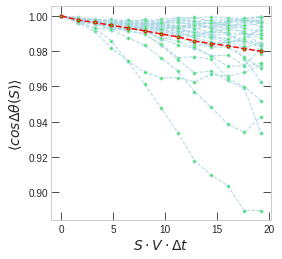

In [61]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

dts = [0.05,0.1,0.2,0.3,0.5]; c=4

# for i in range(len(s0m)):
#     ax.plot(s0m[i],dsm0[i], marker='o', markersize=3, ls='--', lw=1, markerfacecolor='lime', label=r'$\Delta t = %.2f sec.$'%dts[c])
#     #c+=1
for i in range(0,30): #7
    ax.plot(s0_m,dfdsm0[i], marker='o', markersize=3, ls='--', lw=1, color='lightblue', markerfacecolor='lime')#, label=r'$\Delta t = %.2f sec.$'%dts[c])
#for i in range(27,30): #7
#    ax.plot(dfs0[i],dfdsm0[i], marker='o', markersize=3, ls='--', lw=1, color='blue', markerfacecolor='lime')#, label=r'$\Delta t = %.2f sec.$'%dts[c])

#ax.plot(dfs0[19],dfdsm0[19], marker='o', markersize=3, ls='--', lw=1, color='blue', markerfacecolor='lime')
    
ax.plot(s0_m,dsm0_m, marker='o', markersize=3, ls='--', lw=1.5, color='red', markerfacecolor='lime')

#ax.minorticks_on()
ax.tick_params('both', direction='in', top=True, right=True, length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$\langle cos \Delta \theta (S) \rangle$', fontsize=14)
#ax.set_title('F = 0.0(b) | -1.0(k) | 1.0(r) pN', fontsize=14)
#plt.legend()
plt.grid(0)

#plt.savefig('fig/may/LpAllT5-may-md30.pdf', format='pdf', bbox_inches='tight')
plt.show()


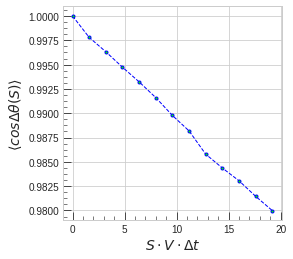

In [108]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

dts = [0.05,0.1,0.2,0.3,0.5]; c=4

# for i in range(len(s0m)):
#     ax.plot(s0m[i],dsm0[i], marker='o', markersize=3, ls='--', lw=1, markerfacecolor='lime', label=r'$\Delta t = %.2f sec.$'%dts[c])
#     #c+=1

ax.plot(s0m[0],dsm0[0], marker='o', markersize=3, ls='--', lw=1, color='blue', markerfacecolor='lime')#, label=r'$\Delta t = %.2f sec.$'%dts[c])
#ax.plot(s_1m[0],dsm_1[0], marker='o', markersize=3, ls='--', lw=1, color='black', markerfacecolor='lime')
#ax.plot(s1m[0],dsm1[0], marker='o', markersize=3, ls='--', lw=1, color='red', markerfacecolor='lime')

ax.minorticks_on()
ax.tick_params('both', direction='in', length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$\langle cos \Delta \theta (S) \rangle$', fontsize=14)
#ax.set_title('F = 0.0(b) | -1.0(k) | 1.0(r) pN', fontsize=14)
#plt.legend()

#plt.savefig('fig/LpAllT5.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [59]:
##i = 3; 
x = s0_m #s0[0] #m[i]['s0m']
y = dsm0_m #dsm0[0] #[i]['dsm0']
y = np.log(y)
## y = y[~np.isnan(y)]
## x = x[:y.shape[0]]
# x = x[:-3]
# y = y['dsm0'][:-3]

In [58]:
dsm0_m

0     1.000000
1     0.997797
2     0.996320
3     0.994733
4     0.993226
5     0.991606
6     0.989773
7     0.988182
8     0.985791
9     0.984367
10    0.983056
11    0.981457
12    0.979989
dtype: float64

In [49]:
y = np.array(y['dsm0'])

KeyError: 'dsm0'

In [50]:
y

0     0.000000
1    -0.002205
2    -0.003686
3    -0.005281
4    -0.006797
5    -0.008429
6    -0.010280
7    -0.011888
8    -0.014311
9    -0.015756
10   -0.017089
11   -0.018717
12   -0.020214
dtype: float64

In [60]:
def func(x,Lp):
    return 1*(-x/(2*Lp))
popt, pcov = curve_fit(func, x, y)


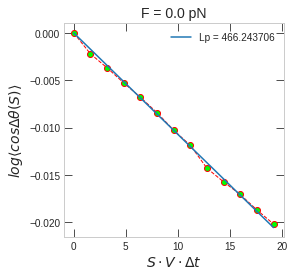

In [64]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm), sharey=True)

ax.plot(x,y, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime')#, label=r'$\Delta t = 0.1 sec.$')
ax.plot(x, func(x,*popt), label='Lp = %s'%np.round(popt[0],6))

#ax.minorticks_on()
ax.tick_params('both', direction='in', top=True, right=True, length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$log \langle cos \Delta \theta (S) \rangle$', fontsize=14)
ax.set_title('F = 0.0 pN', fontsize=14)
ax.legend()
plt.grid(0)

#plt.savefig('fig/may/Lp-md30.pdf', format='pdf', bbox_inches='tight')
plt.show()